In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset, info = tfds.load ('imdb_reviews', with_info = True, as_supervised = True)
x_train, x_test = dataset['train'], dataset['test']

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\91907\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [4]:
import pandas as pd

In [5]:
dataX, dataY = [], []
for i in x_train.as_numpy_iterator():
  dataX.append (i[0])
  dataY.append (i[1])

In [6]:
df_x = pd.DataFrame()
df_y = pd.DataFrame()
df_x['text'] = pd.Series(dataX)
df_y['label'] = pd.Series(dataY)
df = pd.concat ([df_x, df_y], axis = 1)

In [7]:
# df.drop (columns=[0, 0], axis = 1, inplace= True)

# data is encoded in UTF-8, decodeding the data for further processing

In [8]:
df.text = df.text.apply (lambda x : x.decode('utf-8'))

In [9]:
df.label[1]

0

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lemmer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Text Pre-Processing before one_hot encoding

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def get_Data (txt):

  txt = txt.lower()

  txt = re.sub ('[^a-zA-Z]', ' ', txt)

  txt = txt.translate(str.maketrans ('', '', string.punctuation))

  txt = txt.strip()
  
  stop_words = set(stopwords.words('english'))

  txt = stemmer.stem(txt)
  txt = lemmer.lemmatize (txt)

  txt = word_tokenize(txt)
  
  txt = [word for word in txt if word not in stop_words]

  return ' '.join (txt)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91907\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91907\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91907\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
print ('Ritik\'s')

Ritik's


In [13]:
df.text = df.text.apply (get_Data)

In [14]:
corpus = df.text.to_list()

In [15]:
!pip install stylecloud
import stylecloud

distutils: c:\users\91907\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\91907\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\91907\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\91907\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\91907\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [16]:
cloud_txt = ' '.join(corpus)

In [17]:
stylecloud.gen_stylecloud (
    text = cloud_txt,
    icon_name = 'fab fa-imdb',
    palette = 'colorbrewer.diverging.Spectral_11',
    background_color='black',
    gradient='horizontal',
    size = 1024)

C:\Users\91907\AppData\Local\Programs\Python\Python38\lib\site-packages\stylecloud\stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


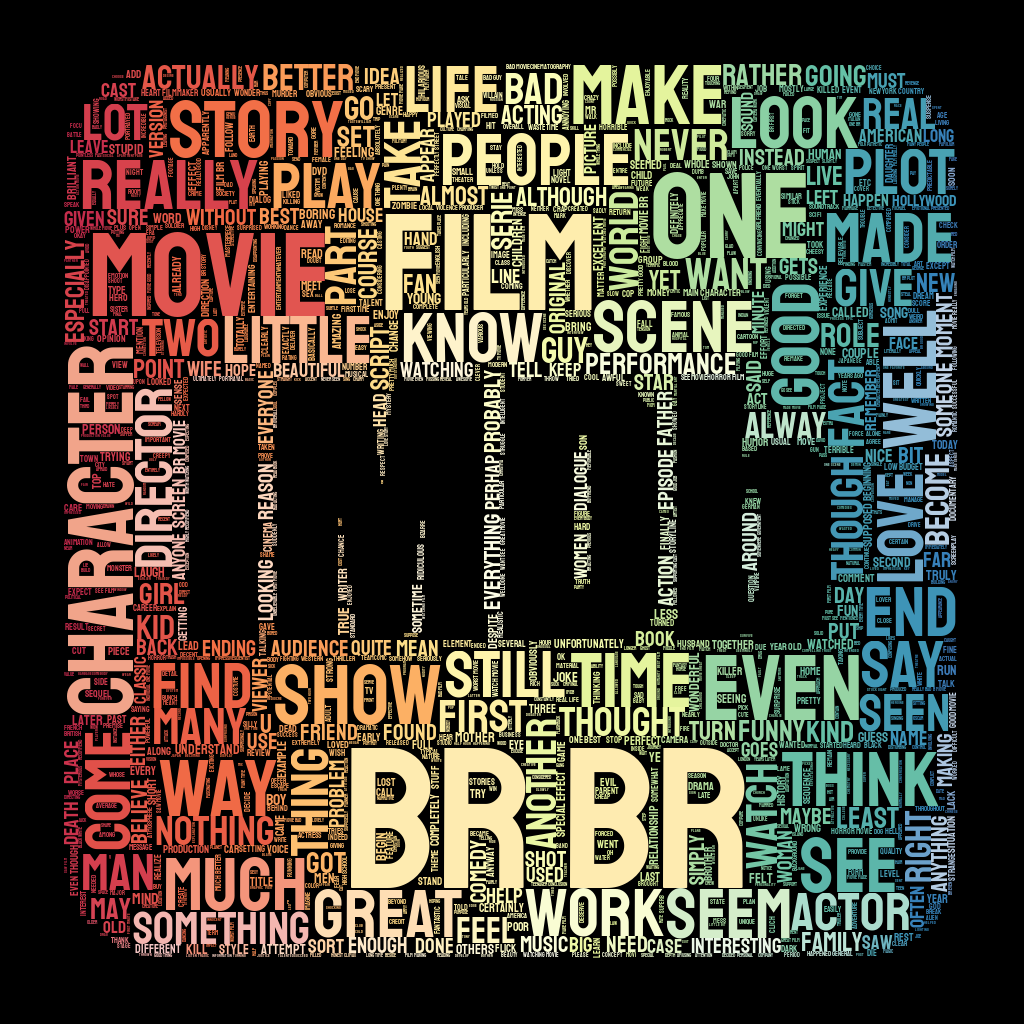

In [18]:
from IPython.display import Image
Image(filename='./stylecloud.png', width = 512, height = 512)

In [19]:
vocab_size = 5000

In [20]:
from tensorflow.keras.preprocessing.text import one_hot

# Coverting text data into Sparse matrix using One_hot representation

In [21]:
one_hot_rep = [one_hot(word, vocab_size) for word in corpus]

In [22]:
# one_hot_rep

In [23]:
len_arr = [len(i) for i in one_hot_rep]

In [24]:
max_padding = max(len_arr)

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# padding the one_hot represetation into an equi-length matrix for input

In [26]:
padded_doc = pad_sequences (one_hot_rep, maxlen = max_padding, padding='pre')

In [27]:
type (padded_doc), type (df.label)

(numpy.ndarray, pandas.core.series.Series)

In [28]:
max_feature = 50
def build_model ():
  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(vocab_size, max_feature, input_length=max_padding),
                               tf.keras.layers.LSTM(units=10),
                               tf.keras.layers.Dense(1)
  ])
  model.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

# LSTM take's 3-D inputs

In [29]:
x = np.array (padded_doc)
y = np.array (df.label)
type (x), type (y)

(numpy.ndarray, numpy.ndarray)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 0)   

In [31]:
model = build_model()

In [32]:
hist = model.fit (x_train, y_train, validation_data=(x_test, y_test), epochs = 8, batch_size=64)

Epoch 1/8
274/274 [==============================] - 76s 252ms/step - loss: 1.2826 - accuracy: 0.5285 - val_loss: 0.4865 - val_accuracy: 0.7796
Epoch 2/8
274/274 [==============================] - 71s 261ms/step - loss: 0.4255 - accuracy: 0.8326 - val_loss: 0.4247 - val_accuracy: 0.8387
Epoch 3/8
274/274 [==============================] - 61s 222ms/step - loss: 0.3594 - accuracy: 0.8454 - val_loss: 0.4545 - val_accuracy: 0.8115
Epoch 4/8
274/274 [==============================] - 58s 211ms/step - loss: 0.3272 - accuracy: 0.8923 - val_loss: 0.4485 - val_accuracy: 0.8428
Epoch 5/8
274/274 [==============================] - 54s 196ms/step - loss: 0.2333 - accuracy: 0.9143 - val_loss: 0.4849 - val_accuracy: 0.8343
Epoch 6/8
274/274 [==============================] - 54s 199ms/step - loss: 0.2151 - accuracy: 0.9295 - val_loss: 0.6477 - val_accuracy: 0.8360
Epoch 7/8
274/274 [==============================] - 55s 202ms/step - loss: 0.1909 - accuracy: 0.9293 - val_loss: 0.5086 - val_accuracy:

In [33]:
# plotting histroy w.r.t to a metric
def graph_plotter (hist, metric):
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_'+metric])
    plt.xlabel('epochs')
    plt.ylabel('metrics')
    plt.legend([metric, 'val_'+metric])

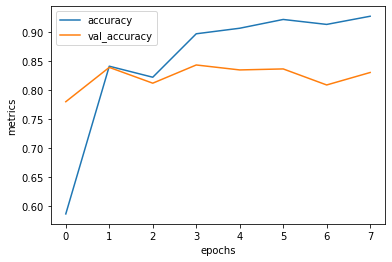

In [34]:
graph_plotter (hist=hist, metric = 'accuracy')

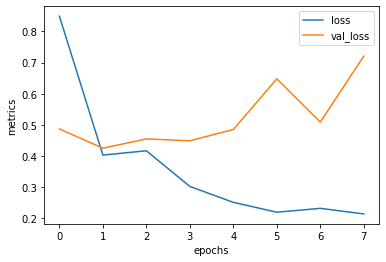

In [35]:
graph_plotter (hist, 'loss')